# Chronos Usage Example

## Loading Chronos Model

In [1]:
import os 
import sys
import torch
import numpy as np

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from tsfmproject.model import ChronosModel
from tsfmproject.dataset import ChronosDataset
# from tsfmproject.utils import load_args

# arg_path = "../config/timesfm.json"
# args = load_args(arg_path)
repo = "amazon/chronos-t5-small"
chronos_model = ChronosModel(repo=repo)


Loading Chronos model from Huggingface repository


## Define the datasets

In [2]:
train_dataset = ChronosDataset(name="ett", datetime_col='date', path='../src/tsfmproject/models/moment/data/ETTh1.csv', 
                             mode='train', batch_size=8)
val_dataset = ChronosDataset(name="ett", datetime_col='date', path='../src/tsfmproject/models/moment/data/ETTh1.csv', 
                             mode='test', batch_size=8)

## Visualize the zero-shot forecasting

/nethome/sli999/TSFMProject/src/tsfmproject/model.py:251: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_seq = torch.tensor(input_seq)


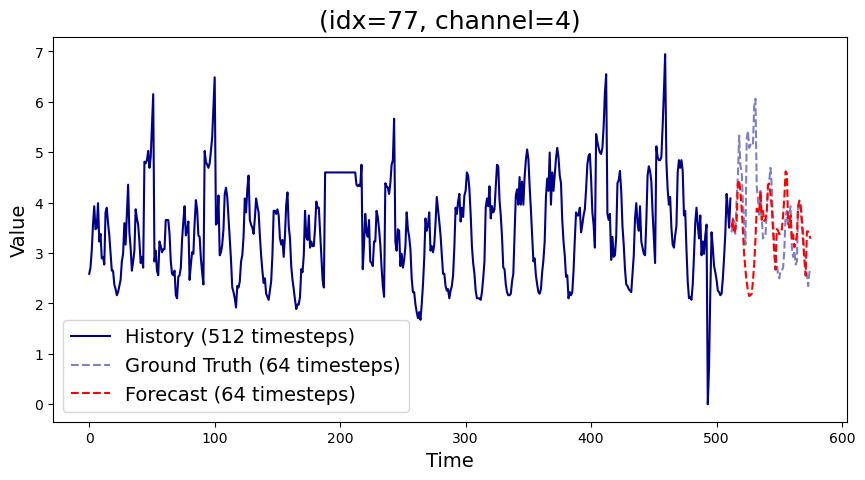

In [3]:
chronos_model.plot(val_dataset, horizon_len=64, quantile_levels=[0.1, 0.5, 0.9])

## Evaluate the zero-shot Chronos Model

In [3]:
metrics = chronos_model.evaluate(val_dataset, horizon_len=64, quantile_levels=[0.1, 0.5, 0.9])
print(metrics)

/nethome/sli999/TSFMProject/src/tsfmproject/model.py:278: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_seq = torch.tensor(input_seq)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 8 and the array at index 58 has size 1

## Finetune Chronos Model on the ETT dataset

In [3]:
chronos_model.finetune(train_dataset)

/nethome/sli999/TSFMProject/src/tsfmproject/models/chronosforecasting/chronos/chronos.py:182: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at ../aten/src/ATen/native/BucketizationUtils.h:32.)
  torch.bucketize(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch 0, Loss: 3.901249193677715
Epoch 1, Loss: 3.8759796458086293
Epoch 2, Loss: 3.8337392571681472
Epoch 3, Loss: 3.799454672433108
Epoch 4, Loss: 3.7668032574429344


## Evaluate the Finetuned Chronos Model

In [ ]:
metrics = chronos_model.evaluate(val_dataset, horizon_len=64, quantile_levels=[0.1, 0.5, 0.9])
print(metrics)